In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil
import pandas as pd

In [2]:
def dist2D(pos1, pos2):
    return np.sqrt((pos1[0]-pos2[0])**2+(pos1[1]-pos2[1])**2)

In [3]:
filename = '20221104_0051.npy'
traj = np.load(f'{filename}', allow_pickle=True).item()
lenFrames = traj['trajectories'].shape[0]
Nfish = traj['trajectories'].shape[1]

# traj of the center of mass:
trajCM = np.sum(traj['trajectories'], axis=1)/Nfish

In [4]:
traj['setup_points']
print(-traj['setup_points']['corners_out'][0,0]+traj['setup_points']['corners_out'][1,0])
print(-traj['setup_points']['corners_out'][3,0]+traj['setup_points']['corners_out'][2,0])

2755
2876


In [5]:
min_dists = []
max_dists = []
max_dists_to_CM = []
for t in range(100000):
    dists = []
    dists_to_CM = []
    for f in range(Nfish-2):
        dists_to_CM.append(dist2D(traj['trajectories'][t,f,:], trajCM[t,:]))
        for g in range(f+1,Nfish):
            d = dist2D(traj['trajectories'][t,f,:], traj['trajectories'][t,g,:])
            dists.append(d)
    min_dists.append(min(dists))
    max_dists.append(max(dists))
    dists_to_CM.append(dist2D(traj['trajectories'][t,Nfish-1,:], trajCM[t,:]))
    max_dists_to_CM.append(max(dists_to_CM))

In [6]:
minDist, maxDist, maxDistCM = min(min_dists), max(max_dists), max(max_dists_to_CM)
avgDistCM = np.average(max_dists_to_CM)
print(f'Min distance between fish: {minDist}')
print(f'Max distance between fish: {maxDist}')
print(f'Max distance to the center of mass: {maxDistCM}')
print(f'Average distance to the center of mass: {avgDistCM}')

Min distance between fish: 0.3319327425231726
Max distance between fish: 1807.0182116972996
Max distance to the center of mass: 1220.0783491539992
Average distance to the center of mass: 335.3628797109582


(0.0, 20.0)

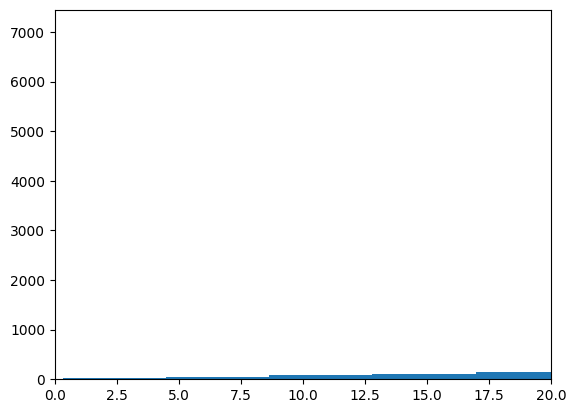

In [7]:
fig, ax = plt.subplots()
ax.hist(min_dists, bins=50)
ax.set_xlim(0,20.0)

(array([  111.,   849.,  2714.,  5168.,  7353.,  9194., 10314., 10624.,
        10287.,  8720.,  7355.,  5939.,  4948.,  3690.,  2734.,  1917.,
         1436.,  1297.,  1035.,   754.,   562.,   488.,   327.,   300.,
          254.,   198.,   219.,   191.,   237.,   100.,    83.,    78.,
          103.,    46.,    45.,    54.,    31.,    31.,    20.,    17.,
           21.,    22.,    21.,    23.,    16.,    18.,    18.,    14.,
           12.,    12.]),
 array([ 133.97146962,  155.69360721,  177.4157448 ,  199.13788239,
         220.86001998,  242.58215757,  264.30429516,  286.02643275,
         307.74857034,  329.47070793,  351.19284552,  372.91498311,
         394.6371207 ,  416.3592583 ,  438.08139589,  459.80353348,
         481.52567107,  503.24780866,  524.96994625,  546.69208384,
         568.41422143,  590.13635902,  611.85849661,  633.5806342 ,
         655.30277179,  677.02490938,  698.74704698,  720.46918457,
         742.19132216,  763.91345975,  785.63559734,  807.35773493

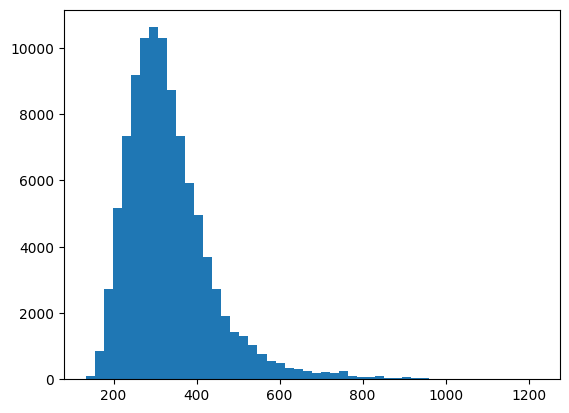

In [25]:
fig, ax = plt.subplots()
ax.hist(max_dists_to_CM, bins=50)
# ax.set_xlim(0,20.0)

In [8]:
# boxSide = round(minDist, 2)
boxSide = minDist
print(boxSide)
# L = ceil(maxDistCM*2/boxSide)
Lint = ceil(avgDistCM*2/boxSide)
L = Lint*boxSide
print(L)
print(avgDistCM*2)

Nboxs = L**2
print(Nboxs)

0.3319327425231726
670.8360726393319
670.7257594219165
450021.0363541629


In [27]:
traj_for_entropy = []
frame_l, col_l, row_l, id_l = [], [], [], []
for t in range(100000):
    timeStep_allf = []
    for f in traj['trajectories'][t]:
        col = int((f[0]-trajCM[0,0]+L/2)/boxSide)
        row = int((f[1]-trajCM[0,1]+L/2)/boxSide)
        x0, y0 = col*boxSide, row*boxSide
        lilBox = (f[0]-trajCM[0,0]+L/2 > x0 + boxSide/2, f[1]-trajCM[0,1]+L/2 > y0 + boxSide/2)
        if lilBox == (False, True):
            id = 1
        elif lilBox == (True, True):
            id = 2
        elif lilBox == (True, False):
            id = 3
        elif lilBox == (False, False):
            id = 4
        # print(col, row, id)
        timeStep_allf.append([col, row, id])
        frame_l.append(t), col_l.append(col), row_l.append(row), id_l.append(id)
    traj_for_entropy.append(timeStep_allf)
traj_for_entropy = np.array(traj_for_entropy)
df_for_entropy = pd.DataFrame({'time': frame_l, 'col':col_l, 'row':row_l, 'id':id_l})


In [10]:
traj['trajectories'].shape

(180001, 8, 2)

In [30]:
cols = pd.unique(df_for_entropy['col'])
rows = pd.unique(df_for_entropy['row'])
for col in cols:
    for row in rows:
        counts = len(df_for_entropy.query('col == @col & row == @row'))
        if counts > 1:
            print(col, row, counts)

1247 2026 2
1247 2316 2
1247 4375 2
1247 727 2
898 1397 2
898 5416 2
898 3899 2
898 -42 2
898 4407 2
898 2689 2
898 2305 2
1207 2777 2
1207 1470 2
693 2284 2
693 4177 2
693 1432 2
774 4585 2
774 2773 2
774 2724 2
1434 1521 2
1434 2569 2


KeyboardInterrupt: 